# Static and Interactive Web Maps

**Author:** _Adi Bronshtein | DC_

**Edited:** _Cameron Bronstein | DSI-9 SF_

## Some docs
- **[GeoPandas Documentation](http://geopandas.org/index.html)**
- **[Folium Documentation](https://python-visualization.github.io/folium/)**
- **[Helpful folium example notebooks](https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/)**
- **[More folium example notebooks...](https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/)**

**If you haven't installed GeoPandas or Folium yet, uncomment and run the following cell**

In [ ]:
# !pip install geopandas
# !pip install folium

_Shapely should be installed with geopandas - confirm this is true by searching your conda environment_

# Data

Download the Shapefile from [this link](https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5).
Or use [the file directory in the repo](./states_21basic).

In [106]:
# imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import mapping

In [107]:
# Load in the shape file
file_path = './data/states_21basic/states.shx'
geo = gpd.read_file(file_path).rename(columns = {'STATE_NAME': 'state'})
geo.sample(10)

,state,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...
13,Iowa,14,19,West North Central,IA,POLYGON ((-91.12013228125002 40.70544336537464...
24,California,25,06,Pacific,CA,(POLYGON ((-121.6652203096974 38.1692853630126...
45,South Carolina,46,45,South Atlantic,SC,(POLYGON ((-81.75959327253234 33.1953813583803...
37,Oklahoma,38,40,West South Central,OK,POLYGON ((-94.43932228434126 34.92915135999505...
31,Colorado,32,08,Mountain,CO,POLYGON ((-102.0444562914241 37.64147436252109...
14,Massachusetts,15,25,New England,MA,(POLYGON ((-71.31932826280908 41.7721953663681...
42,Alabama,43,01,East South Central,AL,POLYGON ((-85.07006727561546 31.98070335724909...
17,Pennsylvania,18,42,Middle Atlantic,PA,POLYGON ((-77.47579326854274 39.71962336445652...
10,Minnesota,11,27,West North Central,MN,POLYGON ((-91.73036628181835 43.49957136797688...


#### We will be adding some SAT data to give our map some extra texture


In [108]:
test_df = pd.read_csv('./data/final.csv')
test_df.sample(10)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1264
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102,0.24,23.9,0.68,567,550,1117
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1010
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1240
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086
26,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196,1.00,20.0,0.10,606,592,1198
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114,0.24,24.1,0.64,565,554,1119
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,639,1272


For the purpose of this lesson, we are only interested in the participation data and the State column.

_Why do we need the state column?_

In [109]:
participation = test_df[[col for col in test_df.columns if 'participation' in col or col == 'state']]
participation.sample(10)

,state,act_participation_17,sat_participation_17,act_participation_18,sat_participation_18
40,South Carolina,1.00,0.50,1.00,0.55
13,Illinois,0.93,0.09,0.43,0.99
27,Nebraska,0.84,0.03,1.00,0.03
35,Ohio,0.75,0.12,1.00,0.18
10,Georgia,0.55,0.61,0.53,0.70
12,Idaho,0.38,0.93,0.36,1.00
19,Maine,0.08,0.95,0.07,0.99
49,Wisconsin,1.00,0.03,1.00,0.03
47,Washington,0.29,0.64,0.24,0.69
20,Maryland,0.28,0.69,0.31,0.76


In [110]:
combined = pd.merge(left = geo, right = participation, on = 'state')
combined.sample(10)

,state,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,act_participation_17,sat_participation_17,act_participation_18,sat_participation_18
47,Louisiana,48,22,West South Central,LA,(POLYGON ((-93.70752428365972 30.2395783556275...,1.00,0.04,1.00,0.04
29,West Virginia,30,54,South Atlantic,WV,POLYGON ((-79.23166327017802 38.48049636330249...,0.69,0.14,0.65,0.28
43,Mississippi,44,28,East South Central,MS,POLYGON ((-88.45080327876401 31.43561735674144...,1.00,0.02,1.00,0.04
22,Nevada,23,32,Mountain,NV,POLYGON ((-119.1524503073572 38.41180136323852...,1.00,0.26,1.00,0.23
46,Arkansas,47,05,West South Central,AR,POLYGON ((-94.46169128436209 34.19676535931296...,1.00,0.03,1.00,0.05
30,Maryland,31,24,South Atlantic,MD,(POLYGON ((-75.71071226689888 38.6496653634600...,0.28,0.69,0.31,0.76
13,Iowa,14,19,West North Central,IA,POLYGON ((-91.12013228125002 40.70544336537464...,0.67,0.02,0.68,0.03
23,Utah,24,49,Mountain,UT,"POLYGON ((-114.0472733026026 38.1376523629832,...",1.00,0.03,1.00,0.04
41,New Mexico,42,35,Mountain,NM,"POLYGON ((-109.049495297948 32.44204435767875,...",0.66,0.11,0.67,0.16
10,Minnesota,11,27,West North Central,MN,POLYGON ((-91.73036628181835 43.49957136797688...,1.00,0.03,0.99,0.04


#### Let's check out our favorite state - what does geometry look like?

In [116]:
# Looking for my state (California)
combined.loc[combined['state'] == 'Hawaii', 'geometry']

0    (POLYGON ((-160.0738033454681 22.0041773479577...
Name: geometry, dtype: object

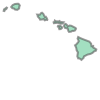

In [117]:
# what does this value look like?
combined.loc[0, 'geometry']

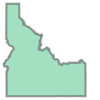

In [115]:
combined.loc[8, 'geometry']

Check the type of the geometry...

In [113]:
type(combined.loc[24, 'geometry'])

shapely.geometry.multipolygon.MultiPolygon

#### Let's make some sense of this.

Basically, geopandas is pandas, but with a twist under the hood to allow for geometric manipulations. 

Shapely is the standard python library for performing geospatial data operations.

## Plotting the Map

Great - Now that we are a little more familiar with geopandas, let's create a map.

Let's use our our 2017 SAT Participation to create our colorscheme for the map. A choropleth map uses color to represent corresponding numeric values to each of our geometries. This allows for an easy and intuitive way to communicate our data.

In [ ]:
# if you get a colorbar error, you made need to upgrade matplotlib
# !pip install --upgrade matplotlib

# import matplotlib
# matplotlib.__version__

In [11]:
# If you got an error message, uncomment this code and run this cell
#!pip install descartes

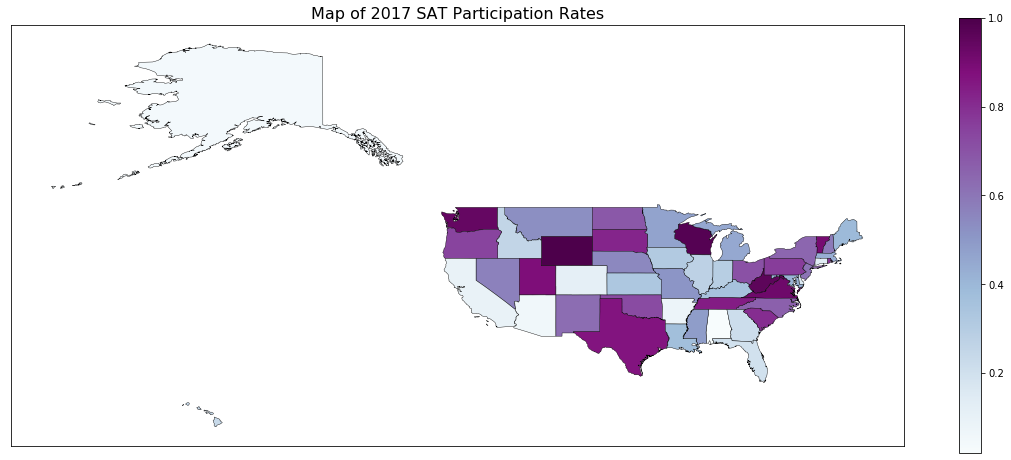

In [119]:
# Creating a subplot, with 'fig' and 'ax'
fig, ax = plt.subplots(1, figsize=(20, 8))

plt.title('Map of 2017 SAT Participation Rates', size=16)

# we can use pandas plotting methods with ease
combined.plot(column='sat_participation_17',                                                    
             cmap='BuPu',      # Colormap for the states                     
             linewidth=0.4,      # line width for state borders
             ax=ax,              # plotting the map on 'ax'
             edgecolor='black'); # State border colors

# we can remove the ticks/ labels
ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels('')
ax.set_yticklabels('')

# Adding a color Bar
c_bar_colors = plt.cm.ScalarMappable(cmap='BuPu', 
                                     norm=plt.Normalize(vmin=combined['sat_participation_17'].min(), 
                                                        vmax=combined['sat_participation_17'].max()))
# Add the colorbar to our figure
color_bar = fig.colorbar(c_bar_colors)

### Here is a blog post about GeoPandas and map visualizations
Nick blog post - [Why you should be using GeoPandas to Visualize Data on Maps (aka Geo-Visualization)](https://medium.com/@minaienick/why-you-should-be-using-geopandas-to-visualize-data-on-maps-aka-geo-visualization-fd1e3b6211b4).

### Static maps are cool, but it's 2019! We do a bit more than this, however!

_But remember_: **Good, Fast, Cheap!**

## Introducing Folium - Interactive WebMaps in Python!

#### Folium generally expects GeoJSON data, which has a specific json format
We can check out what GeoJSON looks like by using the [mapping](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.mapping) function from `shapely`


In [125]:
# Surprisingly, a state like Colorado still has 56 coordinate points.... 
# so much for a clean notebook!
mapping(combined.loc[combined['state'] == 'Colorado', 'geometry'])

{'type': 'FeatureCollection',
 'features': [{'id': '31',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-102.0444562914241, 37.641474362521095),
      (-102.04201029142182, 37.38627936228343),
      (-102.03720729141735, 36.98899436191343),
      (-102.99770929231188, 36.9985233619223),
      (-103.07786629238653, 36.99976036192345),
      (-103.99363529323941, 36.994469361918526),
      (-105.14617229431279, 36.99320736191736),
      (-105.21309129437512, 36.99260436191679),
      (-105.71346029484111, 36.994560361918616),
      (-105.99200029510052, 36.9922893619165),
      (-106.47217729554772, 36.991504361915766),
      (-106.86124929591008, 36.989501361913895),
      (-106.8903702959372, 36.99908336192283),
      (-107.4108202964219, 36.997525361921376),
      (-107.47246029647931, 36.99877636192254),
      (-108.37247329731751, 36.999471361923185),
      (-109.0484802979471, 36.99664136192055),
      (-109.04560229794441, 37.63

In [140]:
# first, we need to create a map object. Easy enough. 
# I picked Lincoln, Nebraska coordinates for the Map center
# You can play around with other parameters like zoom, map tiles, crs, etc...
mappy = folium.Map(location = (40.8136, -96.7026),
                   zoom_start = 4,
                   map_tiles = 'Stamen  ',
# typically, just use the default CRS, otherwise things get weird
                   crs = 'EPSG3857')

mappy

#### To get our data to play nicely with Folium, we need to convert it all to GeoJSON. 
_This includes the data we will use to give the map it's features. Namely, the state name and participation data._

In [134]:
geo_data

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'sat_participation_17': 0.55, 'state': 'Hawaii'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [(((-160.07380334546815, 22.00417734795773),
       (-160.0497093454457, 21.988164347942817),
       (-160.0898583454831, 21.915870347875487),
       (-160.17013734555786, 21.867596347830528),
       (-160.20225934558778, 21.795308347763203),
       (-160.24240634562517, 21.803280347770627),
       (-160.2263363456102, 21.891592347852875),
       (-160.121962345513, 21.96397834792029),
       (-160.07380334546815, 22.00417734795773)),),
     (((-159.33517434478023, 21.94834334790573),
       (-159.43954534487744, 21.86807134783097),
       (-159.57602134500453, 21.88413634784593),
       (-159.64024734506435, 21.94836534790575),
       (-159.7365923451541, 21.9644203479207),
       (-159.8008143452139, 22.036666347987985),
       (-159.71250634513166, 22.14905934809266),
       (-159.

In [135]:
# pass the columns from combined df into the mapping function
geo_data = mapping(combined[['state', 'geometry', 'sat_participation_17']])

# create a Choropleth class
sat_17 = folium.Choropleth(
        geo_data= geo_data,                          # our geojson data
        data= combined,                              # confusingly, we also need our dataframe data
        columns= ['state', 'sat_participation_17'],  # and specify the columns to match our geodata
        fill_color='BuPu',                          # Multiple color ranges accepted
        key_on='properties.state',                  # For each feature, find the property to bind dataframe 
        legend_name='Participation (%)',         
        name='SAT Participation, 2017',
        highlight=True                              # highlight is a nice function
).add_to(mappy)                                     # add to map objects

# this hack allows for tooltips! 
sat_17.geojson.add_child(folium.features.GeoJsonTooltip(
        fields= ['state', 'sat_participation_17'],      # field is where to pull data from GeoJSON       
        aliases=['State: ', 'Participation (%): '],     # (sort of like key_on feature above, but different syntax)
        sticky=True))               # folows the mouse around vs fixed point in each object

# allows toggling of map layers
folium.LayerControl(collapsed=False).add_to(mappy)

# show the map!
mappy

## Choropleth with Geodataframe
**A bit simpler to implement, but not web-map friendly**

In [97]:
mappy = folium.Map(location = (40.8136, -96.7026),
                   zoom_start = 4)

sat_17 = folium.Choropleth(
    geo_data=combined[['state', 'geometry', 'sat_participation_17']],
    data=combined,
    columns=['state', 'sat_participation_17'],
    fill_color='BuPu',
    key_on='properties.state',
    legend_name='Participation (%)',
    name='SAT Participation, 2017',
    highlight=True).add_to(mappy)

sat_17.geojson.add_child(
    folium.features.GeoJsonTooltip(fields = ['state', 'sat_participation_17'],
                                   aliases= ['State: ', 'Participation: '],
                                   sticky=False))

folium.LayerControl(collapsed=False).add_to(mappy)

mappy

### Or, we can create a choropleth directly through the GeoJson Class

The `GeoJson` class underlies the `Choropleth` class. However, unsurprisingly we mustt use the `GeoJSON` data format to play nice here. Benefits of the `GeoJSON` class are more accessible manipulation of the `style_function` and `highlight_function`. However, these can also be added to Choropleth via the `add_child()` method.

In [100]:
# we need to explicitly create a colormap and add it to the dataframe
from branca.colormap import linear

In [101]:
# colors can accept a flaot value within the range passed in to the scale function
colors = linear.BuPu_09.scale(vmin=combined['sat_participation_17'].min(),
                     vmax=combined['sat_participation_17'].max())

In [104]:
m = folium.Map(location = (40.8136, -96.7026),
                   zoom_start = 4)

# convert geodataframe to GeoJSON format
geo_data = mapping(combined[['state', 'geometry', 'sat_participation_17']])

folium.GeoJson(data=geo_data,
               style_function=lambda feature: { # use our colormap
                                   'fillColor': colors(feature['properties']['sat_participation_17']),
                                   'color': 'black',
                                   'weight': 1,
                                   'fillOpacity': 0.7},
               highlight_function=lambda feature: {
                                    'weight':3,
                                    'fillColor':colors(feature['properties']['sat_participation_17'])}, 
               tooltip=folium.GeoJsonTooltip(
                                    fields=['state', 'sat_participation_17'],
                                    aliases=['State', 'Participation (%)'], 
                                    localize=False)
                  ).add_to(m)
    
m

## Main Takeaways
- Interactive Web Maps allow substantially more functionality, customization and user engagement.
- Python is not a front end optimized programming language.
- **[Leaflet](https://leafletjs.com/)**, a JavaScript based map API underlies the Folium library.